### Импортировать библиотеки

credit.policy: 1, если клиент соответствует критериям LendingClub.com, и 0 в противном случае.

purpose: Цель ссуды (принимает значения "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business" и "all_other").

int.rate: Процентная ставка по ссуде, как пропорция (ставка 11% будет сохранена как 0,11). Заемщикам, которых LendingClub.com считает более рискованными, назначаются более высокие процентные ставки.

installment: Ежемесячные платежи, причитающиеся заемщику, если кредит финансируется.

log.annual.inc: Натуральный журнал самооценки годового дохода заемщика.

dti: Отношение долга к доходу заемщика (сумма долга, деленная на годовой доход).

fico: Кредитный рейтинг FICO заемщика.

days.with.cr.line: Количество дней, в течение которых у заемщика была кредитная линия.

revol.bal: Оборотный баланс заемщика (сумма, не выплаченная в конце цикла выставления счетов по кредитной карте).

revol.util: Коэффициент использования возобновляемой линии заемщика (сумма использованной кредитной линии по отношению к общему доступному кредиту).

inq.last.6mths: Количество запросов заемщика от кредиторов за последние 6 месяцев.

delinq.2yrs: Количество случаев просрочки платежа заемщиком на 30+ дней за последние 2 года.

pub.rec: Количество нарушающих публичных записей заемщика (заявления о банкротстве, налоговые залоги или судебные решения).



In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Получить данные

In [7]:
df = pd.read_csv('loan_data.csv')

### Ознакомьтесь с информацией при помощи методов info(), head() и describe() о кредитах

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [9]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [10]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Исследовательский анализ данных

### Создайте гистограмму двух распределений FICO друг над другом, по одному для каждого результата credit.policy

** Примечание: это довольно сложно, не стесняйтесь посмотреть решение. Вероятно, вам понадобится одна строка кода для каждой гистограммы, я также рекомендую просто использовать pandas, встроенные в .hist () **

Text(0.5, 0, 'FICO')

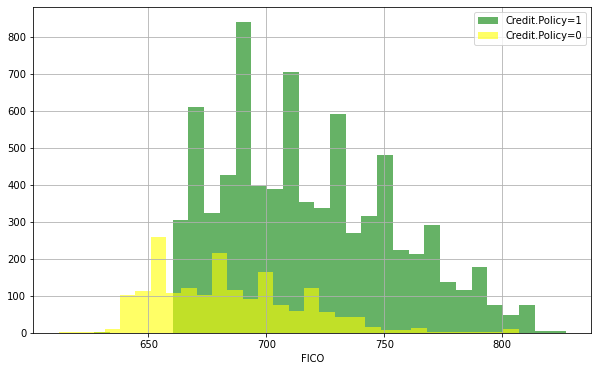

In [33]:
#Размер рамки
plt.figure(figsize=(10, 6))
#Целевые колонки для изучения
#bins - количество колонок
#color - цвет 
#label - название
#alpha - прозрачность

df[df['credit.policy'] == 1]['fico'].hist(bins=30, color = 'green', label = 'Credit.Policy=1', alpha=0.6)
df[df['credit.policy'] == 0]['fico'].hist(bins=30, color = 'yellow', label = 'Credit.Policy=0', alpha=0.6 )
#Подпись
plt.legend()
#определить имя х оси
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

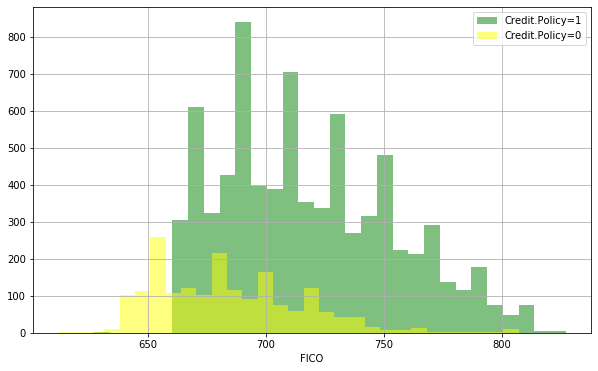

### Создайте аналогичную фигуру, но на этот раз выберите столбец not.fully.paid.

Text(0.5, 0, 'FICO')

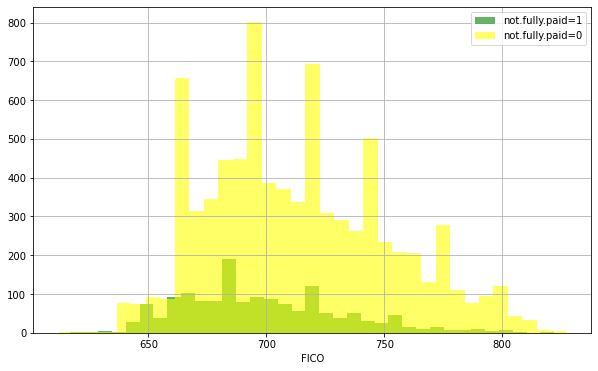

In [34]:
plt.figure(figsize=(10, 6))
df[df['not.fully.paid'] == 1]['fico'].hist(bins=35, color='green', label='not.fully.paid=1', alpha=0.6)
df[df['not.fully.paid'] == 0]['fico'].hist(bins=35, color='yellow', label='not.fully.paid=0', alpha=0.6)
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

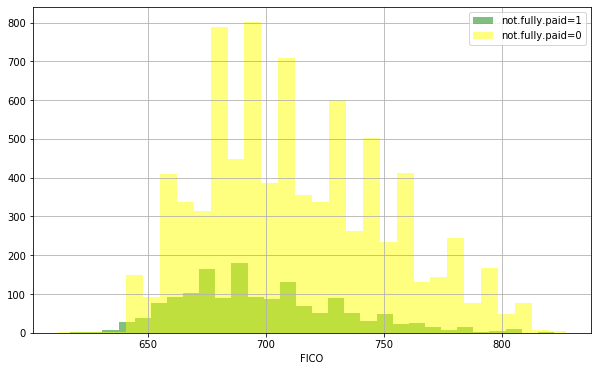

### Создайте график countplot с помощью seaborn, показывающий количество ссуд по назначению, с цветовым оттенком, определяемым not.fully.paid

<AxesSubplot:xlabel='purpose', ylabel='count'>

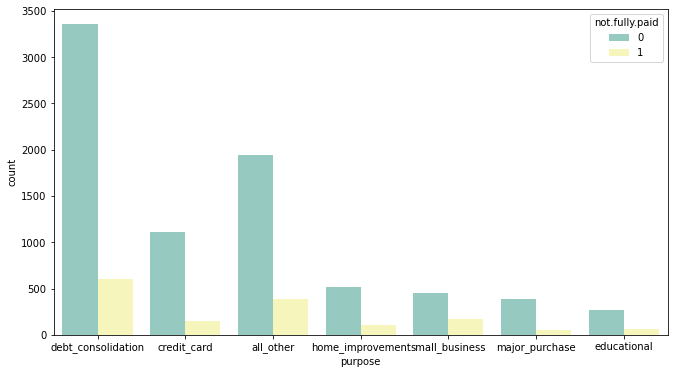

In [43]:
plt.figure(figsize=(11, 6))
sns.countplot(x='purpose', hue='not.fully.paid', data=df, palette='Set3')

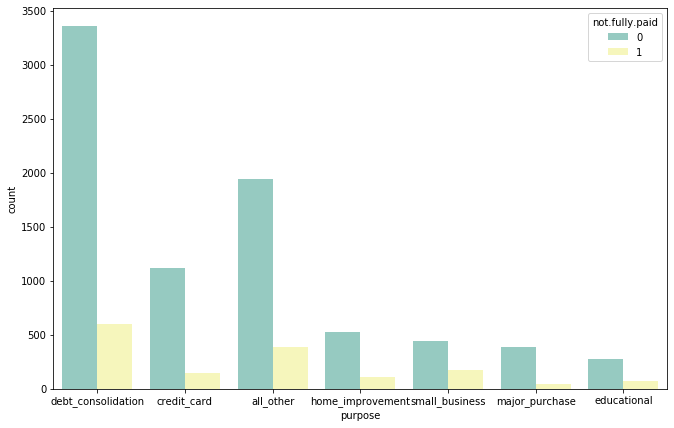

### Давайте посмотрим на тенденцию между рейтингом FICO и процентной ставкой. Воссоздайте следующий jointplot

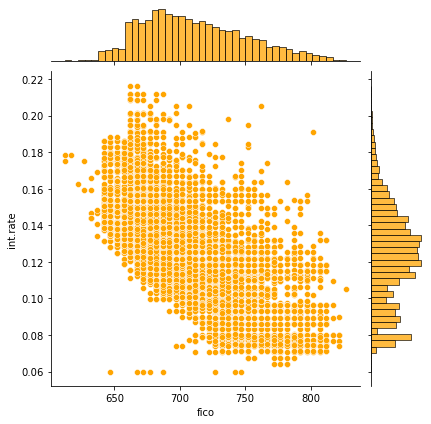

In [45]:
sns.jointplot(x='fico', y='int.rate', data=df, color='orange')

### Создайте следующие lmplots, чтобы увидеть, различалась ли тенденция между not.fully.paid и credit.policy. Обратитесь к документации для lmplot(), если вы не можете понять, как разделить его на столбцы

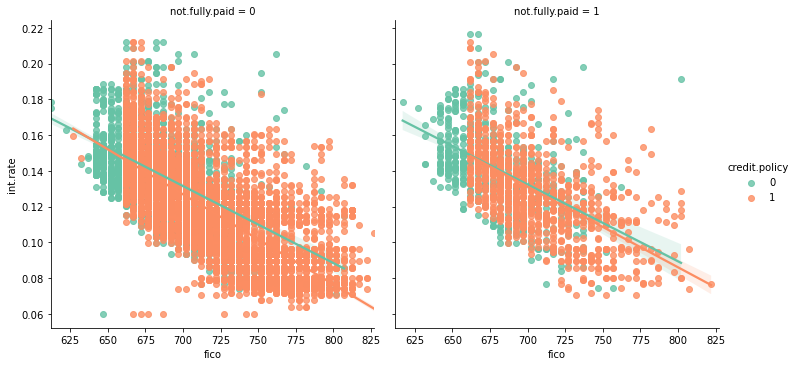

In [52]:
sns.lmplot(x='fico', y='int.rate', data=df, hue='credit.policy', col='not.fully.paid', palette='Set2')

<Figure size 792x504 with 0 Axes>

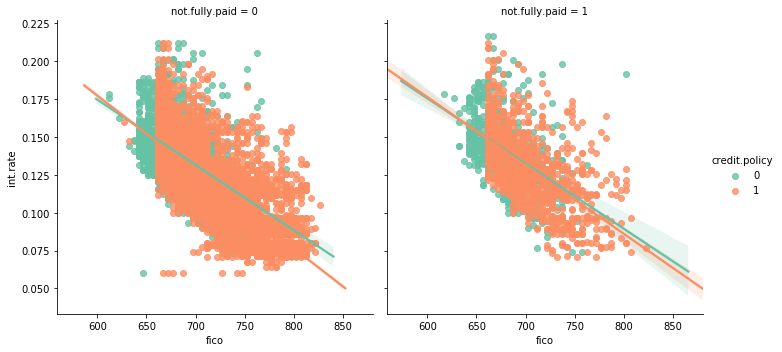

# Настройка данных
* Давайте подготовимся к настройке данных для нашей модели классификации случайных лесов

### Проверьте loans.info() ещё раз

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


## Категориальные фичи

Обратите внимание, что столбец **purpose** категориальный

Это означает, что нам нужно преобразовать их с помощью фиктивных переменных (dummy variables), чтобы sklearn мог их понять. Давайте сделаем это за один шаг, используя pd.get_dummies.

Давайте рассмотрим способ работы с этими столбцами, который при необходимости может быть расширен до нескольких категорийных характеристик при необходимости.

* Создайте список из 1 элемента, содержащий строку 'purpose'. Назовите этот список cat_feats. 

In [56]:
cat_feats = ['purpose']

### Теперь используйте pd.get_dummies(loans,columns=cat_feats,drop_first=True), чтобы создать фиксированную dataframe большего размера, которая имеет новые столбцы функций с фиктивными переменными. Установите эту dataframe как final_data.

In [57]:
final_data = pd.get_dummies(df,columns=cat_feats,drop_first=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

In [58]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


## Train Test Split

Пришло время разделить наши данные на набор для обучения и набор для тестирования

* Используйте sklearn, чтобы разделить данные на набор для обучения и набор для тестирования, как мы делали раньше

In [65]:
# Разделим данные на обучающие и тестовые
from sklearn.model_selection import train_test_split

In [68]:
X = final_data.drop('not.fully.paid', axis=1)
#предсказываем
y = final_data['not.fully.paid']

In [69]:
# тренируем
#train_test_split +shift + tab
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Обучение модели дерева решений

Начнем с обучения одного дерева решений

* Импортировать DecisionTreeClassifier 

In [70]:
from sklearn.tree import DecisionTreeClassifier

### Создайте экземпляр DecisionTreeClassifier() с именем dtree и подгоните его под данные обучения

In [72]:
# Создать объект
dtree = DecisionTreeClassifier()

In [73]:
#Тренировать
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

## Прогнозы и оценка дерева решений
* Создайте прогнозы из тестового набора данных и создайте отчет о классификации и матрицу неточностей

In [74]:
#Предсказывать
predictions = dtree.predict(X_test)

Вывод данных

In [75]:
from sklearn.metrics import classification_report, confusion_matrix

In [76]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      2431
           1       0.19      0.23      0.21       443

    accuracy                           0.72      2874
   macro avg       0.52      0.52      0.52      2874
weighted avg       0.75      0.72      0.74      2874



In [77]:
print(confusion_matrix(y_test, predictions))

[[1979  452]
 [ 339  104]]


[[2000  431]
 [ 339  104]]


## Обучение модели Random Forest

Пришло время обучить нашу модель

* Создайте экземпляр класса RandomForestClassifier и подгоните его под обучающие данные из предыдущего шага

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
#Создать объект
rfc = RandomForestClassifier(n_estimators=200)

In [81]:
#Тренировать
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## Прогнозы и оценка

Давайте предскажем значения y_test и оценим нашу модель

* Предсказать класс not.fully.paid по данным X_test

In [82]:
#Предсказать
rfc_pred = rfc.predict(X_test)

### Теперь создайте отчет о классификации по результатам. Вы получаете что-нибудь странное или какое-то предупреждение? 

In [83]:
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.53      0.02      0.03       443

    accuracy                           0.85      2874
   macro avg       0.69      0.51      0.48      2874
weighted avg       0.80      0.85      0.78      2874



              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2431
           1       0.44      0.02      0.03       443

    accuracy                           0.85      2874
   macro avg       0.64      0.51      0.47      2874
weighted avg       0.78      0.85      0.78      2874



### Покажите матрицу неточностей для прогнозов

In [84]:
print(confusion_matrix(y_test, rfc_pred))

[[2424    7]
 [ 435    8]]


[[2422    9]
 [ 436    7]]
